In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data=pd.read_csv("/content/drive/MyDrive/Demo recommend DATN/Crop_recommendation.csv")
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


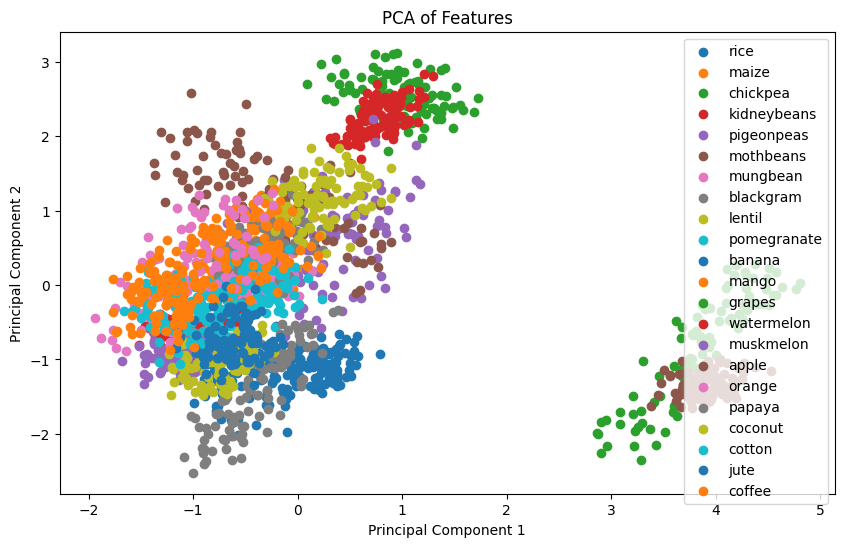

In [40]:
X = data.drop('label', axis=1)
y = data['label']

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tạo DataFrame mới từ các thành phần chính và nhãn
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y

# Các nhãn (label) có trong tập dữ liệu
labels = pca_df['label'].unique()

# Tạo một plot
plt.figure(figsize=(10, 6))

# Lặp qua từng nhãn và vẽ các điểm tương ứng
for label in labels:
    subset = pca_df[pca_df['label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

# Đặt các nhãn và tiêu đề
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Features')
plt.legend()

# Hiển thị plot
plt.show()

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [42]:
data_new = data[['N', 'P', 'K', 'ph', 'label']]

X = data_new.drop('label', axis=1)
y = data_new['label']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [45]:
distances, indices = knn.kneighbors(X_test, n_neighbors=10)
distances, indices

(array([[0.08389138, 0.09703394, 0.10102773, 0.217598  , 0.23854827],
        [0.04352363, 0.17945745, 0.19442079, 0.21337977, 0.21792581],
        [0.18423144, 0.25496178, 0.27043921, 0.28836979, 0.28984077],
        ...,
        [0.17951749, 0.28418161, 0.34651608, 0.35430806, 0.37081378],
        [0.12677066, 0.1669472 , 0.30044244, 0.30454853, 0.31589959],
        [0.17212523, 0.19348108, 0.24836226, 0.27549358, 0.28621172]]),
 array([[ 872,  713,  794, 1543,  461],
        [1542,  741,  903,  537,  862],
        [  19,  100,  112,  642, 1632],
        ...,
        [1156,  921,  335,  138, 1581],
        [ 941, 1547,   65,  196, 1427],
        [1213, 1590, 1321,  519,  143]]))

In [46]:
labels_count = dict.fromkeys(set(y_test), 0)
total_count = len(y_test)

for i in range(len(y_test)):
    for j in indices[i]:
        if j < len(y_train) and y_train.iloc[j] == y_test.iloc[i]:
            labels_count[y_test.iloc[i]] += 1
            break

accuracy_per_label = {label: count/total_count for label, count in labels_count.items()}
print("accuracy_per_label:")
print(accuracy_per_label)

accuracy_per_label:
{'coffee': 0.031818181818181815, 'mango': 0.04090909090909091, 'coconut': 0.05909090909090909, 'kidneybeans': 0.045454545454545456, 'mungbean': 0.04090909090909091, 'muskmelon': 0.038636363636363635, 'rice': 0.038636363636363635, 'orange': 0.031818181818181815, 'chickpea': 0.05909090909090909, 'lentil': 0.022727272727272728, 'watermelon': 0.04318181818181818, 'blackgram': 0.045454545454545456, 'jute': 0.05227272727272727, 'cotton': 0.038636363636363635, 'apple': 0.05227272727272727, 'pigeonpeas': 0.045454545454545456, 'banana': 0.04772727272727273, 'grapes': 0.031818181818181815, 'mothbeans': 0.05, 'papaya': 0.05227272727272727, 'pomegranate': 0.04772727272727273, 'maize': 0.04772727272727273}


In [52]:
total_count

440

In [48]:
import joblib

# Lưu mô hình vào file
joblib.dump(knn, '/content/drive/MyDrive/Demo recommend DATN/KNN_model.pkl')

['/content/drive/MyDrive/Demo recommend DATN/KNN_model.pkl']

In [49]:
# Để load lại mô hình từ file
loaded_model = joblib.load('/content/drive/MyDrive/Demo recommend DATN/KNN_model.pkl')

In [51]:
N = 104
P = 18
K = 30
ph = 7.2

test_data = np.array([[N, P, K, ph]])
prediction = loaded_model.predict_proba(test_data)
prediction

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])